# Creating a dataframe using a json-formatted Twitter data

In [ ]:
# Importing the neccessary libraries and the os module
import pandas as pd

In [ ]:
import os, json

In [ ]:
import datetime

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pytz

In [ ]:
# 1. Creating a file path to the folder containg the json files
json_file_path = './whaling_tweet_dataset_2020-01-14'

In [ ]:
# 2. Writing a list comprehension to parse all the '.json' formatted file names to a list by calling 'os.listdir' function on the predefined file path 
json_file_names = [ file_name for file_name in os.listdir(json_file_path) if file_name.endswith('.json') ]

In [ ]:
# 3. Loading the actual data inside the 'json_file_names' with a list comprehension and 'json.load' funciton, which takes each element inside 'json_file_names' together with file path to open
data_inside_json_files = [ json.load(open(json_file_path + '/' + json_file_name)) for json_file_name in json_file_names ]


In [ ]:
# 4. Extracting the relevant ['created_at'] and ['lang'] columns from the list containg json files' data
created_at_and_lang_tuples = [ (data['created_at'], data['lang']) for data in data_inside_json_files ]


In [ ]:
# 5. Making a dataframe with the tuples and specifying ['created_at'] and ['lang'] to be the columns 
df = pd.DataFrame(created_at_and_lang_tuples, columns = ['created_at','lang'])


In [ ]:
# 6. Renaming the columns of dataframe
df = df.rename(columns={'created_at': 'date', 'lang':'language'})

# Making a graph which shows the total number tweets sent per day in both Japanese & English.

In [ ]:
# 1. Instantiating an empty list to store the elements inside the ['date'] column with the desirable ["day/month/year"] format for plotting
date_time = []

In [ ]:

# 1.1 Looping through each element inside the ['date'] column, using the strptime() method in order to create a datetime object from the string in an existing format for the program to easily handle the date times
# 1.2 Applying the strftime() method on the datetime object which will convert it to a string and change the format to be sorted by days
for ele in df['date']:
    date_time.append(datetime.datetime.strptime(ele, "%a %b %d %X %z %Y").strftime("%d %B %Y"))
    

In [ ]:
# 3. Setting the 'date_time' as ['date'] column of dataframe
df['date'] = date_time

In [ ]:
# 4. Sorting the values inside dataframe by the daily ['date'] column in an ascending order, groupby by ['date'] and ['language'] columns, and count the data points
df_series = df.sort_values(by=['date'], ascending = True).groupby(['date','language'])['language'].count()


In [ ]:
# 5. Creating a new dataframe from the resulting series at the previous step
df_two = pd.DataFrame(df_series)

In [ ]:
# 6. Extracting ['date'] column of dataframe to reorder the data  
df_two.columns = ['date']
df_two = df_two.unstack(level=0).T.reset_index().loc[:,"date":].set_index("date")


In [ ]:
# 7. Defining the column names to show the relevant information 
df_two.columns = ["Number of tweets in English", "Number of tweets in Japanese"]

<AxesSubplot:xlabel='date'>

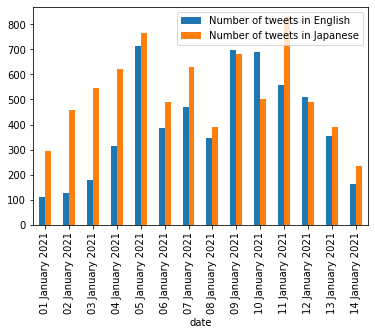

In [ ]:
# 8. Plotting the resulting dataframe as a barplot
df_two.plot(kind = 'bar')